### Grip @The Sparks Foundation

### Coder : Deepali Aggarwal(Data Science and Business Analytics Intern)

### Task 6 : Prediction using Decision Tree Algorithm

(Level - Intermediate)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as datasets

In [2]:
#Importing dataset
df = pd.read_csv('Iris.csv')

In [3]:
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#Check null values if any
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Data Analysis

Text(0.5, 0, 'Sepal Width')

<Figure size 432x288 with 0 Axes>

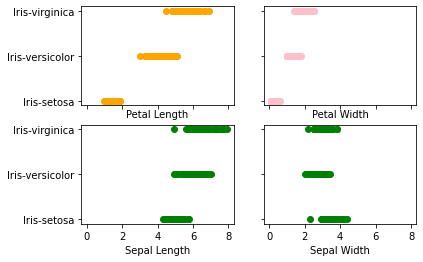

In [5]:
f = plt.figure()    
f, axes = plt.subplots(nrows = 2, ncols = 2, sharex=True, sharey = True)

axes[0][0].scatter(df['PetalLengthCm'], df['Species'], color = 'orange')
axes[0][0].set_xlabel('Petal Length')

axes[0][1].scatter(df['PetalWidthCm'], df['Species'], color = 'pink')
axes[0][1].set_xlabel('Petal Width')

axes[1][0].scatter(df['SepalLengthCm'], df['Species'], color = 'green')
axes[1][0].set_xlabel('Sepal Length')

axes[1][1].scatter(df['SepalWidthCm'], df['Species'], color = 'green')
axes[1][1].set_xlabel('Sepal Width')


###### As we can see Sepal Length and Sepal Width for three kind of flowers is not much different and hence it would n't contribute much in classifying the different data points

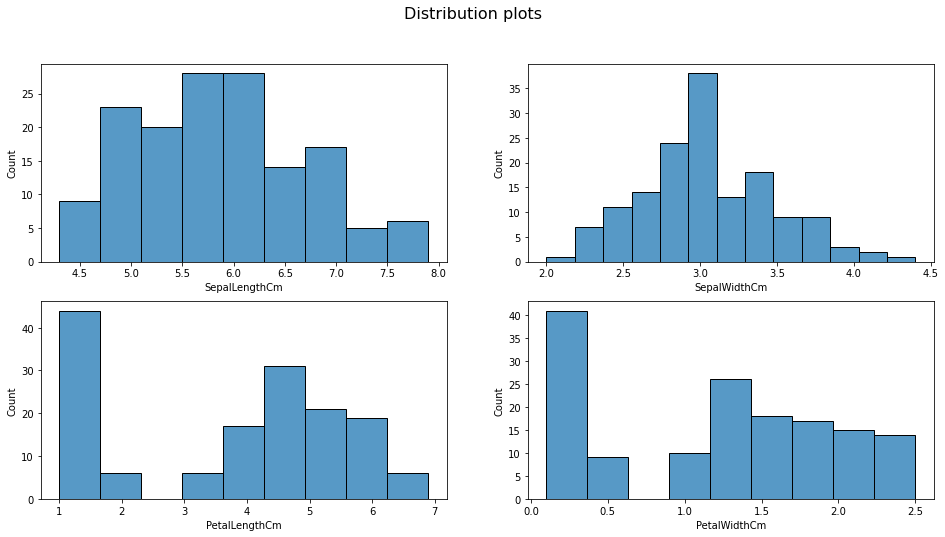

In [6]:
fig,axes = plt.subplots(2,2,figsize=(16,8))
fig.suptitle("Distribution plots", fontsize=16)
sns.histplot(df['SepalLengthCm'],ax=axes[0,0])
sns.histplot(df['SepalWidthCm'],ax=axes[0,1])
sns.histplot(df['PetalLengthCm'],ax=axes[1,0])
sns.histplot(df['PetalWidthCm'],ax=axes[1,1])
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

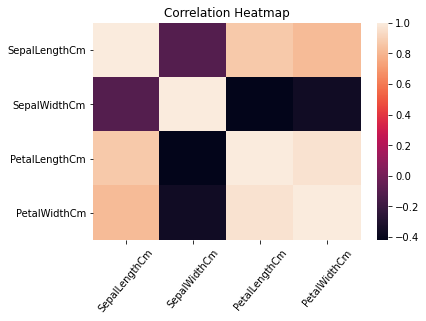

In [7]:
sns.heatmap(df.drop(['Id'], axis = 1).corr())
plt.xticks(rotation = 50)
plt.title("Correlation Heatmap")

#### As we can see Petal Length, Petal Width, Sepal Length are highly correlated and Sepal Width is least correlated to any of feature

In [8]:
#Convert categorical feature to numerical
feature_val = {'Iris-setosa' : 0, 'Iris-virginica' : 1, 'Iris-versicolor' : 2}
df.replace(to_replace = feature_val ,  inplace = True)

In [9]:
X = df.drop(['Species', 'Id'], axis = 1)
Y = df['Species']

In [10]:
# Split the dataset for training and testing

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y , test_size = 0.2)

In [11]:
# Train the model
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [12]:
#Prediction for the test data and accuracy_score
y_pred = clf.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9

### Decision Tree 

[Text(446.4, 391.392, 'SepalWidthCm <= 2.45\ngini = 0.662\nsamples = 120\nvalue = [46, 34, 40]'),
 Text(334.79999999999995, 304.416, 'gini = 0.0\nsamples = 46\nvalue = [46, 0, 0]'),
 Text(558.0, 304.416, 'PetalLengthCm <= 1.75\ngini = 0.497\nsamples = 74\nvalue = [0, 34, 40]'),
 Text(223.2, 217.44, 'SepalWidthCm <= 5.05\ngini = 0.093\nsamples = 41\nvalue = [0, 2, 39]'),
 Text(111.6, 130.464, 'gini = 0.0\nsamples = 38\nvalue = [0, 0, 38]'),
 Text(334.79999999999995, 130.464, 'SepalLengthCm <= 2.75\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(223.2, 43.488, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(446.4, 43.488, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(892.8, 217.44, 'SepalWidthCm <= 4.85\ngini = 0.059\nsamples = 33\nvalue = [0, 32, 1]'),
 Text(781.1999999999999, 130.464, 'Id <= 5.95\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(669.5999999999999, 43.488, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(892.8, 43.488, 'gini = 0.0\nsamples = 1\

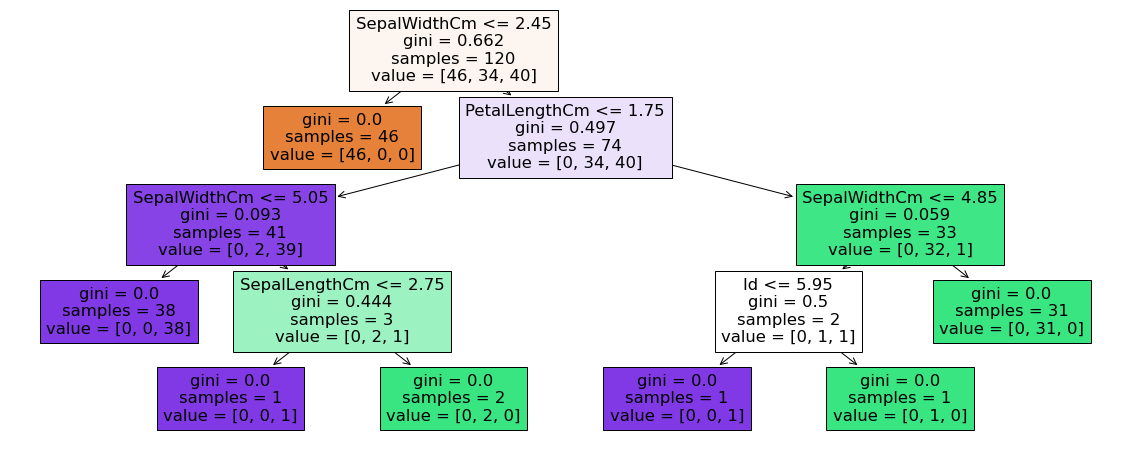

In [13]:
from sklearn import tree
plt.figure(figsize = (20 , 8))
tree.plot_tree(clf , filled= True, feature_names = df.columns )

In [17]:
# Applying cost complexity pruning technique to check if accuracy score can be further improved

In [14]:
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas , path.impurities
ccp_alphas

array([0.        , 0.00808081, 0.01111111, 0.02059621, 0.25843737,
       0.35536036])

In [15]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state = 0 , ccp_alpha = ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
    

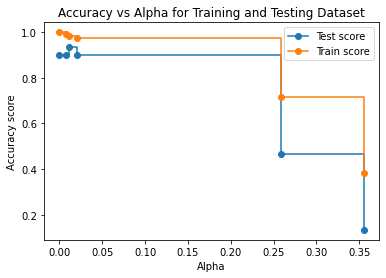

In [16]:
Test_score = [clf.score(x_test, y_test) for clf in clfs]
Train_score = [clf.score(x_train, y_train) for clf in clfs ]
fig ,ax = plt.subplots()
ax.set_xlabel("Alpha")
ax.set_ylabel("Accuracy score")
ax.set_title("Accuracy vs Alpha for Training and Testing Dataset")
ax.plot(ccp_alphas , Test_score , marker = 'o', label = 'Test score', drawstyle = 'steps-post')
ax.plot(ccp_alphas , Train_score , marker = 'o', label = 'Train score', drawstyle = 'steps-post')
ax.legend()
plt.show()

#### As we can see after taking different values for ccp_alpha in DecisionTreeClassifier, accuracy score for training test data and test data is almost same and there is no overfitting of algorithm. So no need of hyperparameter Tuning.

In [18]:
clf = DecisionTreeClassifier(ccp_alpha=0.02)
clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.02)

In [19]:
clf.score(x_test, y_test)

0.9333333333333333